# Ejercicio 04
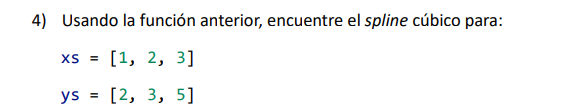

In [3]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1  
    h = [xs[i+1] - xs[i] for i in range(n)]  
    
    alpha = [0] * (n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])
    
    l = [1.0]  
    mu = [0.0] 
    z = [0.0]  
    
    for i in range(1, n):
        l.append(2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1])
        mu.append(h[i]/l[i])
        z.append((alpha[i] - h[i-1]*z[i-1])/l[i])
    
    l.append(1.0)
    z.append(0.0)
    c = [0.0]*(n+1)
    
    for i in range(n-1, -1, -1):
        c[i] = z[i] - mu[i]*c[i+1]
    
    x = sym.Symbol('x')
    splines = []
    
    for j in range(n):
        a = ys[j]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    
    return splines



In [2]:
# Example usage
xs = [0, 1, 2]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
print("Spline expressions:")
_ = [display(s) for s in splines]
print("\nExpanded forms:")
_ = [display(s.expand()) for s in splines]

Spline expressions:


0.25*x**3 + 0.75*x + 2

1.5*x - 0.25*(x - 1)**3 + 0.75*(x - 1)**2 + 1.5


Expanded forms:


0.25*x**3 + 0.75*x + 2

-0.25*x**3 + 1.5*x**2 - 0.75*x + 2.5